In [2]:
import pandas as pd 
import numpy as np 
import os 
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
# (this is not an exhaustive list of libraries)

import json


from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
all_forwards =  pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/all_players.csv')
all_defence = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/all_defence.csv')

In [5]:
# Concatenate all DataFrames into one
all_players = pd.concat([all_forwards, all_defence], ignore_index=True)
# Save the merged DataFrame to a CSV file
all_players.to_csv('all_players.csv', index=False)
print("Merged DataFrame saved to all_players.csv")

Merged DataFrame saved to all_players.csv


In [10]:
all_players.head()


,player_id,gameCount,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,gameWinningGoals,otGoals,shots,shifts,pim
0,8449795,66.0,11.0,17.0,28.0,-3.0,0.0,0.0,1.0,0.0,92.0,0.0,33.0
1,8467468,20.0,1.0,3.0,4.0,-8.0,0.0,1.0,0.0,0.0,14.0,417.0,4.0
2,8470666,57.0,4.0,1.0,5.0,-1.0,0.0,0.0,2.0,0.0,44.0,748.0,100.0
3,8451858,40.0,9.0,8.0,17.0,-9.0,4.0,8.0,0.0,0.0,85.0,0.0,16.0
4,8468001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [7]:
all_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185738 entries, 0 to 185737
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   player_id         185738 non-null  int64  
 1   gameCount         185738 non-null  float64
 2   goals             185738 non-null  float64
 3   assists           185738 non-null  float64
 4   points            185738 non-null  float64
 5   plusMinus         185738 non-null  float64
 6   powerPlayGoals    185738 non-null  float64
 7   powerPlayPoints   185738 non-null  float64
 8   gameWinningGoals  185738 non-null  float64
 9   otGoals           185738 non-null  float64
 10  shots             185738 non-null  float64
 11  shifts            185738 non-null  float64
 12  pim               185738 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 18.4 MB


In [8]:
all_players.describe()

,player_id,gameCount,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,gameWinningGoals,otGoals,shots,shifts,pim
count,1.857380e+05,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000,185738.000000
mean,8.462922e+06,34.648327,5.350747,8.017740,13.368487,-2.780363,1.097191,2.897205,0.722227,0.063902,50.971271,405.026796,23.399008
std,1.240834e+04,27.373857,7.320300,10.509874,17.175725,8.146572,2.373869,5.826992,1.301611,0.296663,56.333210,552.465983,33.986963
min,8.444869e+06,1.000000,0.000000,0.000000,0.000000,-61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.449646e+06,7.000000,0.000000,0.000000,1.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000
50%,8.464963e+06,31.000000,2.000000,4.000000,6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,63.000000,12.000000
75%,8.474705e+06,59.000000,8.000000,12.000000,20.000000,0.000000,1.000000,3.000000,1.000000,0.000000,81.000000,780.000000,31.000000
max,8.484958e+06,86.000000,69.000000,109.000000,164.000000,76.000000,27.000000,53.000000,13.000000,4.000000,378.000000,2591.000000,408.000000


In [14]:
player_id = 8480950
player_data = all_players.loc[player_id]

print(player_data)

KeyError: 8480950

In [8]:
all_players_over_20_games = all_players[all_players['gameCount'] > 20]
len(all_players_over_20_games)

104296

In [9]:
all_players_over_40_games = all_players[all_players['gameCount'] > 40]
len(all_players_over_40_games)

78057

In [10]:
all_players_over_60_games = all_players[all_players['gameCount'] > 60]
len(all_players_over_60_games)

42588

In [43]:
# Create a copy of the all_players DataFrame to avoid modifying the original DataFrame
all_players_averages = all_players_over_40_games.copy()

# List of columns to exclude from the division
exclude_columns = ['player_id', 'gameCount']

# Divide each column (except player_id and gameCount) by the gameCount column
for col in all_players_averages.columns:
    if col not in exclude_columns:
        all_players_averages[col] = all_players_averages[col] / all_players_averages['gameCount']

# Drop player_id and gameCount cols
all_players_averages = all_players_averages.drop(columns=['player_id', 'gameCount', 'pim', 'plusMinus', 'shifts', 'gameWinningGoals', 'otGoals'])


In [45]:
from sklearn.model_selection import train_test_split

# perform train test split here
# Define the target variable and features
target = 'points'
features = all_players_averages.columns.drop(target, ['player_id', 'gameCount'])

# Perform the train-test split
train_df, test_df = train_test_split(all_players_averages, test_size=0.2, random_state=42)

# Handle NaN or infinite values before converting to integers
train_df = train_df.replace([np.inf, -np.inf], np.nan).fillna(0)
test_df = test_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Convert all float columns to integers in train_df
float_cols_train = train_df.select_dtypes(include=['float']).columns
train_df[float_cols_train] = train_df[float_cols_train].astype(int)

# Convert all float columns to integers in test_df
float_cols_test = test_df.select_dtypes(include=['float']).columns
test_df[float_cols_test] = test_df[float_cols_test].astype(int)

# Display the shapes of the train and test sets
print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Train set shape: (62445, 6)
Test set shape: (15612, 6)


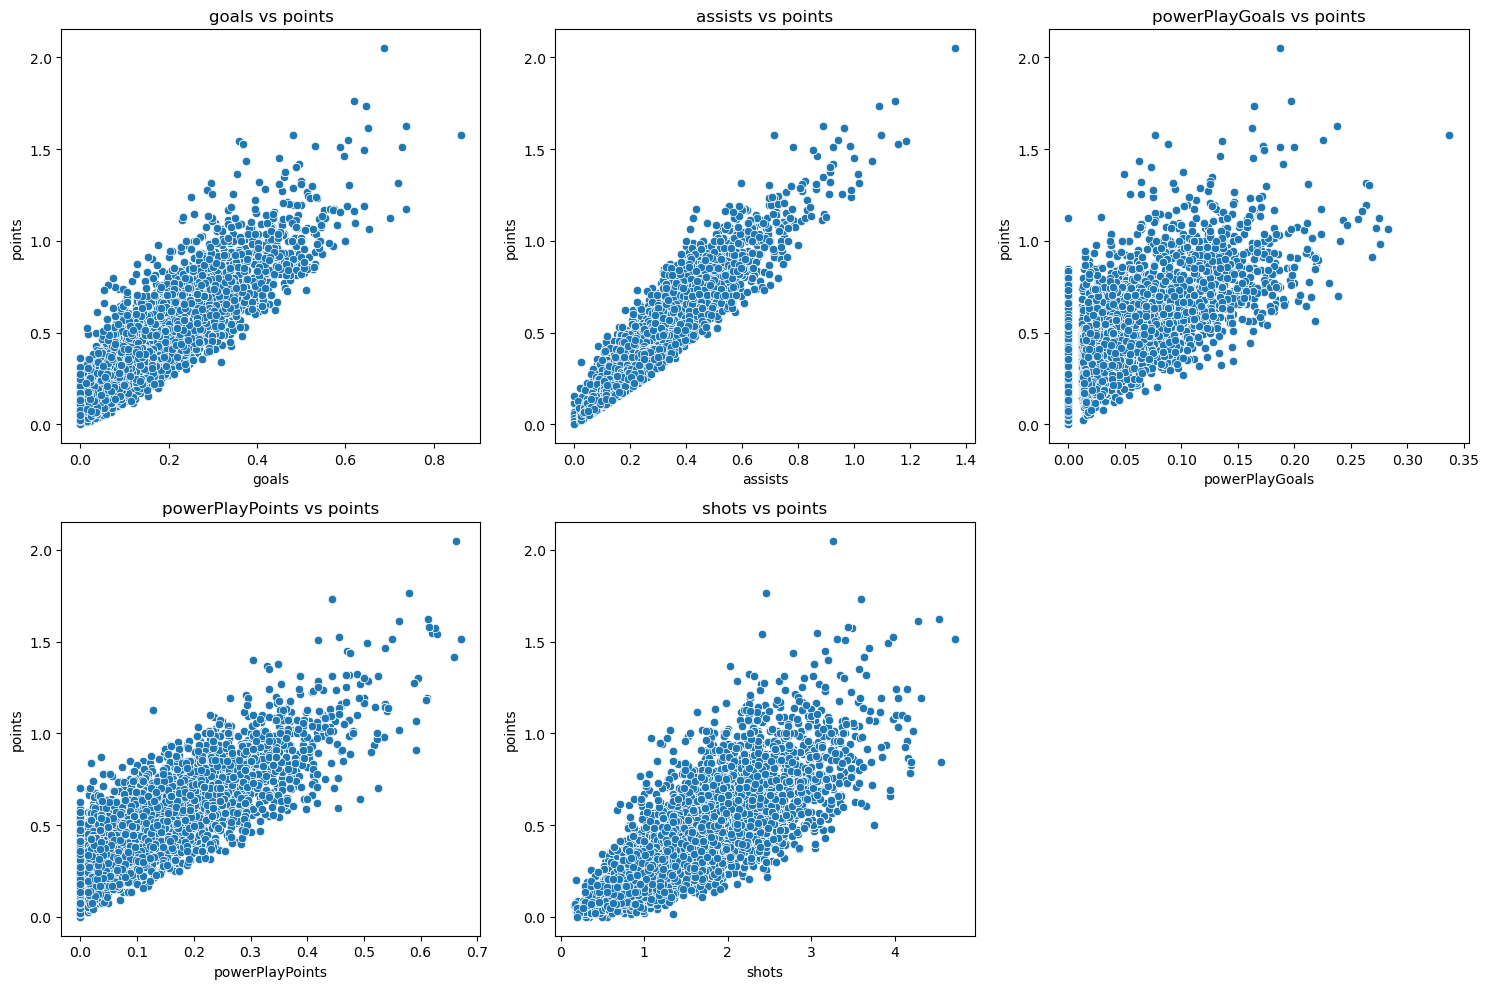

In [46]:
# perform EDA here, Scatter Plot
# Define the target variable
target = 'points'# Determine the number of rows and columns for the subplots grid
num_features = len(features)
num_cols = 3  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the features and create scatter plots in each subplot
for i, feature in enumerate(features):
    sns.scatterplot(x=all_players_averages[feature], y=all_players_averages[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

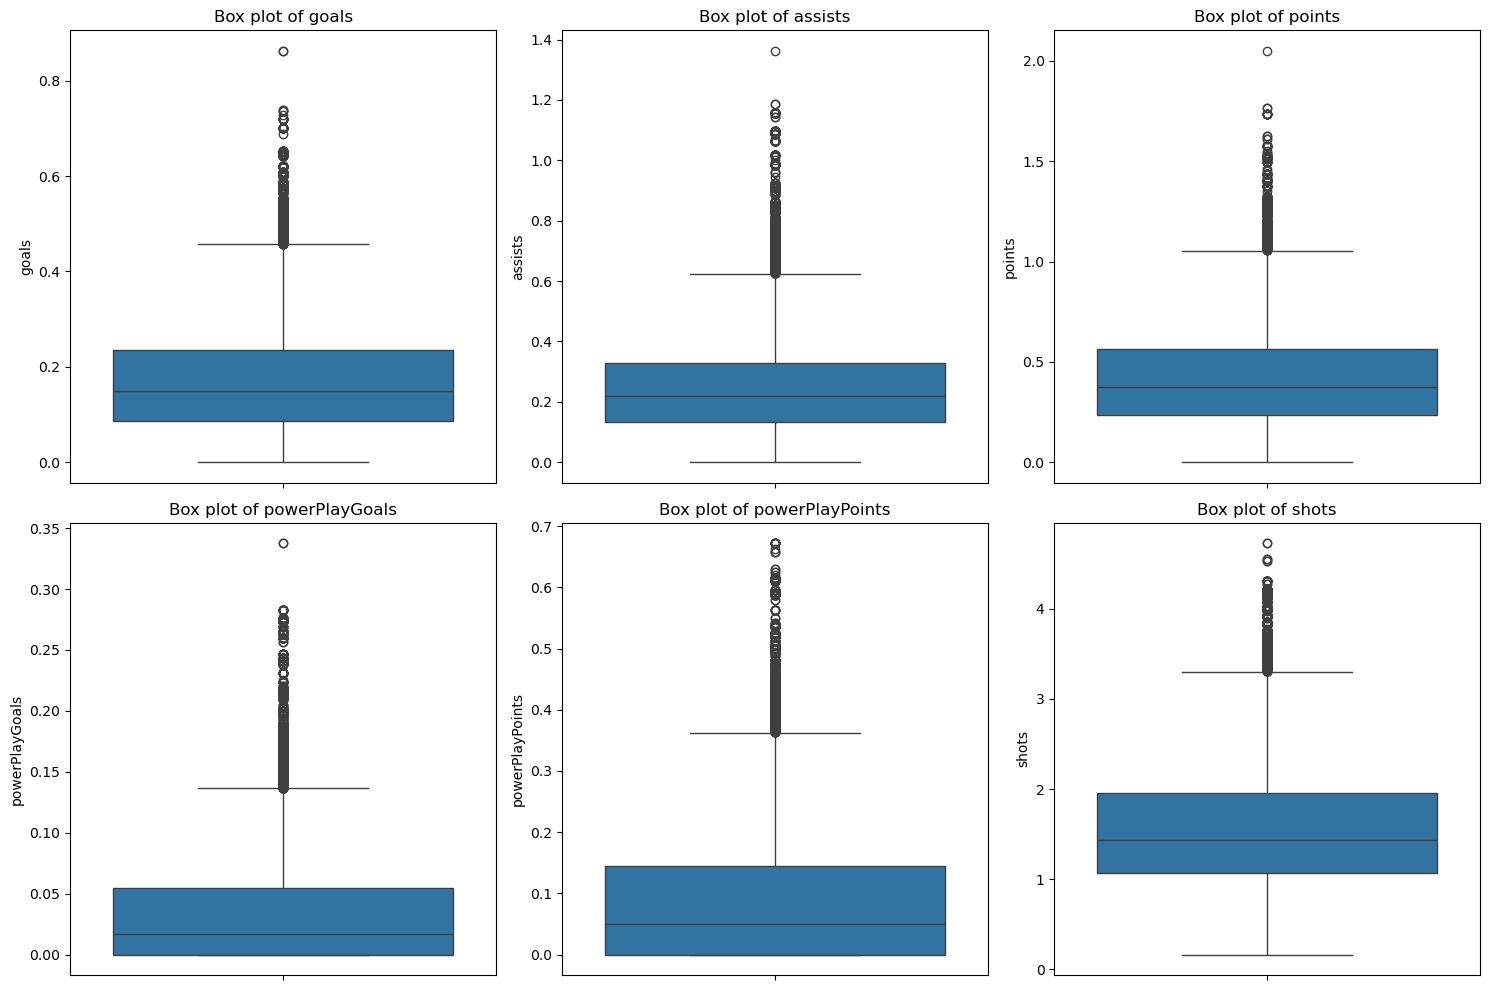

In [47]:
# Get the list of columns
columns = all_players_averages.columns

# Determine the number of rows and columns for the subplots grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the columns and create box plots in each subplot
for i, column in enumerate(columns):
    sns.boxplot(y=all_players_averages[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
# Identify numeric columns in the training and test sets
numeric_cols_train = train_df.select_dtypes(include=[np.number]).columns.drop(target)
numeric_cols_test = test_df.select_dtypes(include=[np.number]).columns.drop(target)

# Convert all numeric columns to integers in train_df and test_df
train_df[numeric_cols_train] = train_df[numeric_cols_train].astype(int)
test_df[numeric_cols_test] = test_df[numeric_cols_test].astype(int)

In [50]:
from sklearn.preprocessing import PolynomialFeatures

# 2. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly.fit_transform(train_df[numeric_cols_train])
test_poly = poly.transform(test_df[numeric_cols_test])

# Convert polynomial features to DataFrame
train_poly_df = pd.DataFrame(train_poly, columns=poly.get_feature_names_out(numeric_cols_train))
test_poly_df = pd.DataFrame(test_poly, columns=poly.get_feature_names_out(numeric_cols_test))

# Add the target variable back to the polynomial DataFrames
train_poly_df[target] = train_df[target].reset_index(drop=True)
test_poly_df[target] = test_df[target].reset_index(drop=True)

In [51]:
# Display the polynomial DataFrames to verify the changes
train_poly_df.shape

(62445, 21)

                           Feature  Importance
19                         shots^2    0.420262
4                            shots    0.357752
1                          assists    0.078551
10                       assists^2    0.071907
13                   assists shots    0.071528
3                  powerPlayPoints    0.000000
5                          goals^2    0.000000
6                    goals assists    0.000000
7             goals powerPlayGoals    0.000000
8            goals powerPlayPoints    0.000000
9                      goals shots    0.000000
2                   powerPlayGoals    0.000000
11          assists powerPlayGoals    0.000000
12         assists powerPlayPoints    0.000000
14                powerPlayGoals^2    0.000000
15  powerPlayGoals powerPlayPoints    0.000000
16            powerPlayGoals shots    0.000000
17               powerPlayPoints^2    0.000000
18           powerPlayPoints shots    0.000000
0                            goals    0.000000


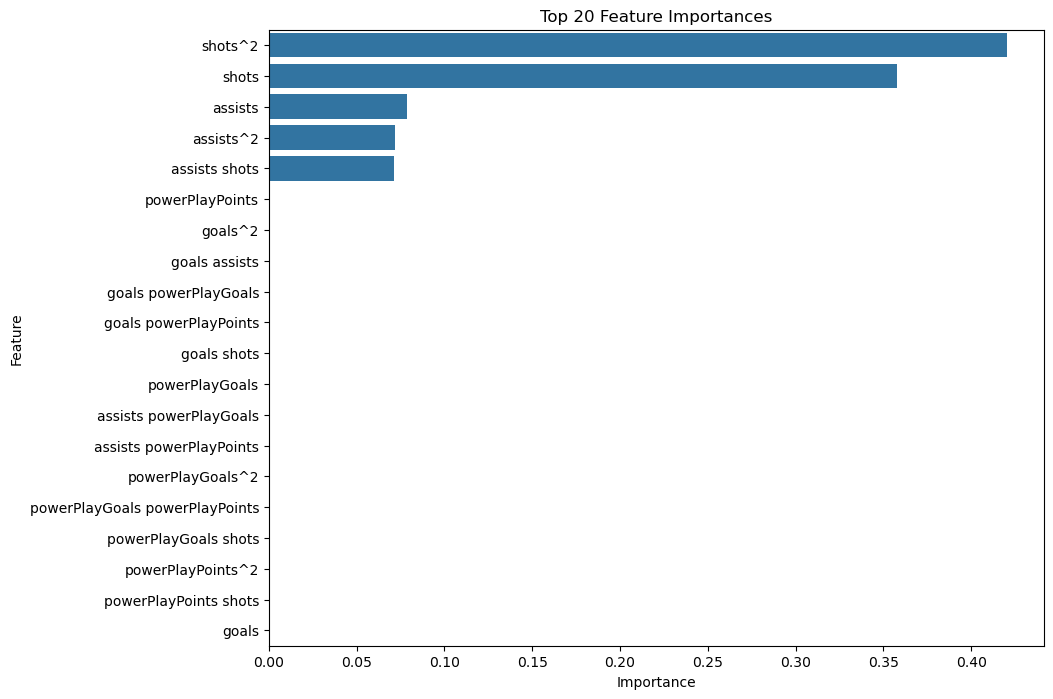

In [52]:
# Define the target variable
target = 'points'

# Separate features and target
X_train = train_poly_df.drop(columns=[target])
y_train = train_poly_df[target]

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 20 features
top_features = feature_importances.head(30)
print(top_features)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Feature Importances')
plt.show()

# Create a new DataFrame with the top 30 features
top_feature_names = top_features['Feature'].tolist()
train_top_features_df = train_poly_df[top_feature_names + [target]]

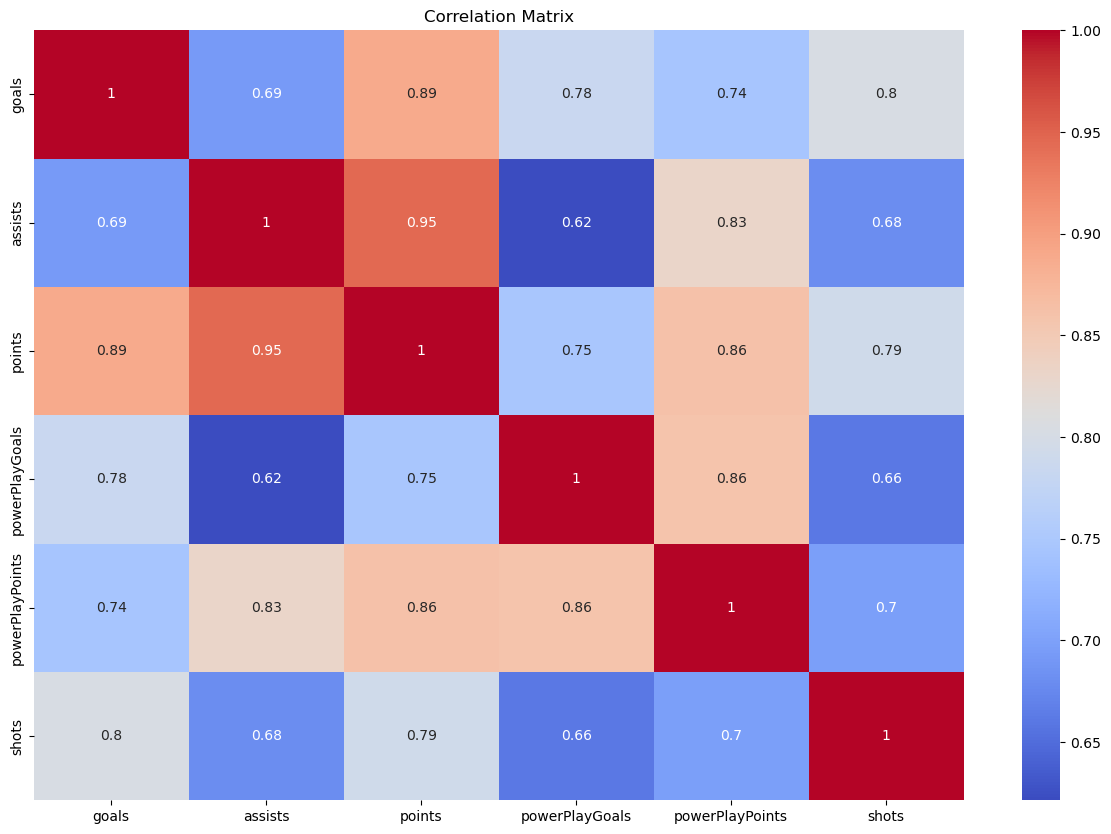

In [53]:
# Select only numeric columns
numeric_columns = all_players_averages.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = all_players_averages[numeric_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

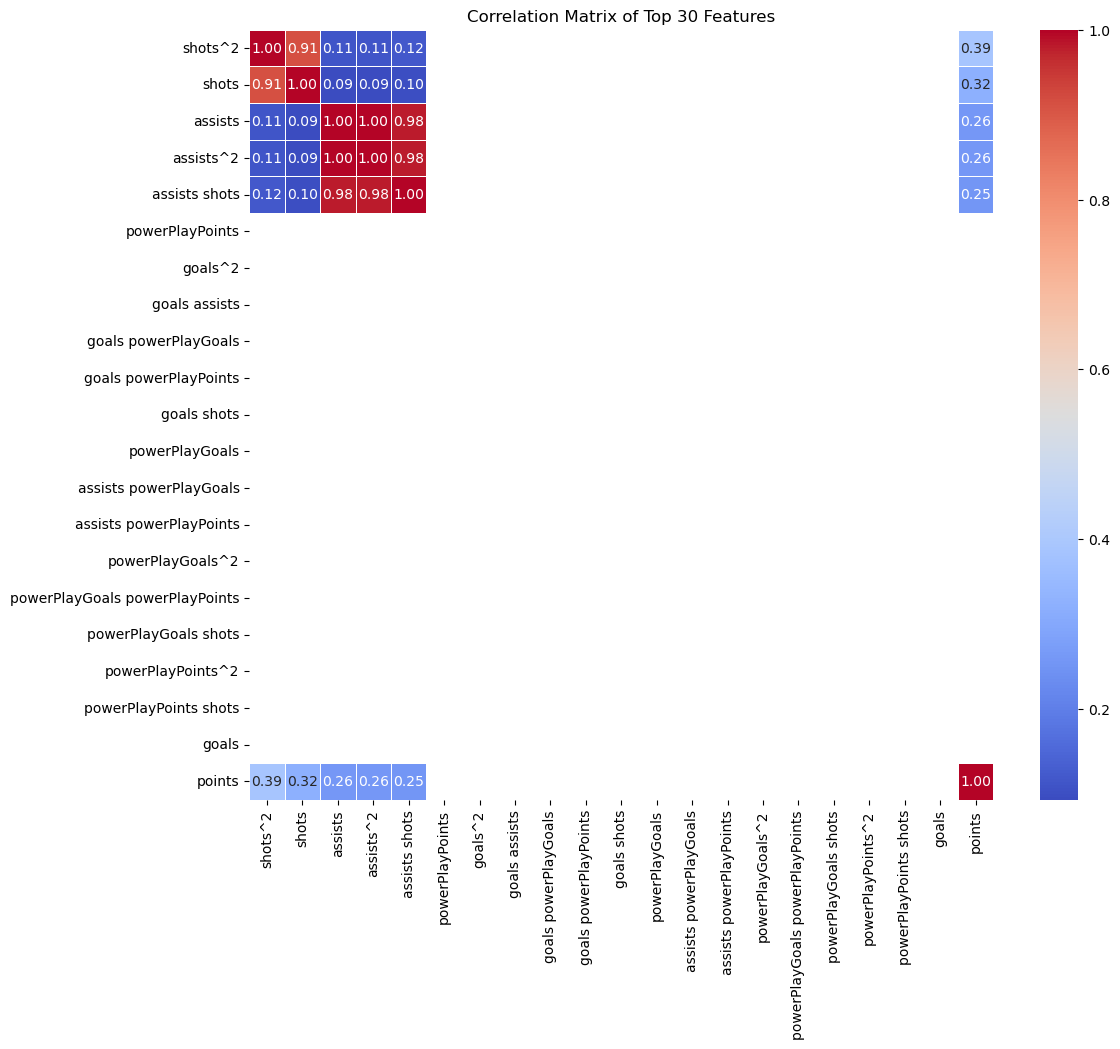

Highly correlated feature pairs:


,Feature1,Feature2,Correlation
0,shots,shots^2,0.914394
1,assists^2,assists,1.000000
2,assists shots,assists,0.981069
3,assists shots,assists^2,0.981069


In [54]:
# Calculate the correlation matrix
correlation_matrix = train_top_features_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top 30 Features')
plt.show()

# Identify highly correlated features
threshold = 0.85
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
print("Highly correlated feature pairs:")
high_corr_pairs_df

Explained Variance Ratio: [0.54635499 0.45364501]
Shape of train_pca_df: (62445, 3)
Shape of test_pca_df: (15612, 3)


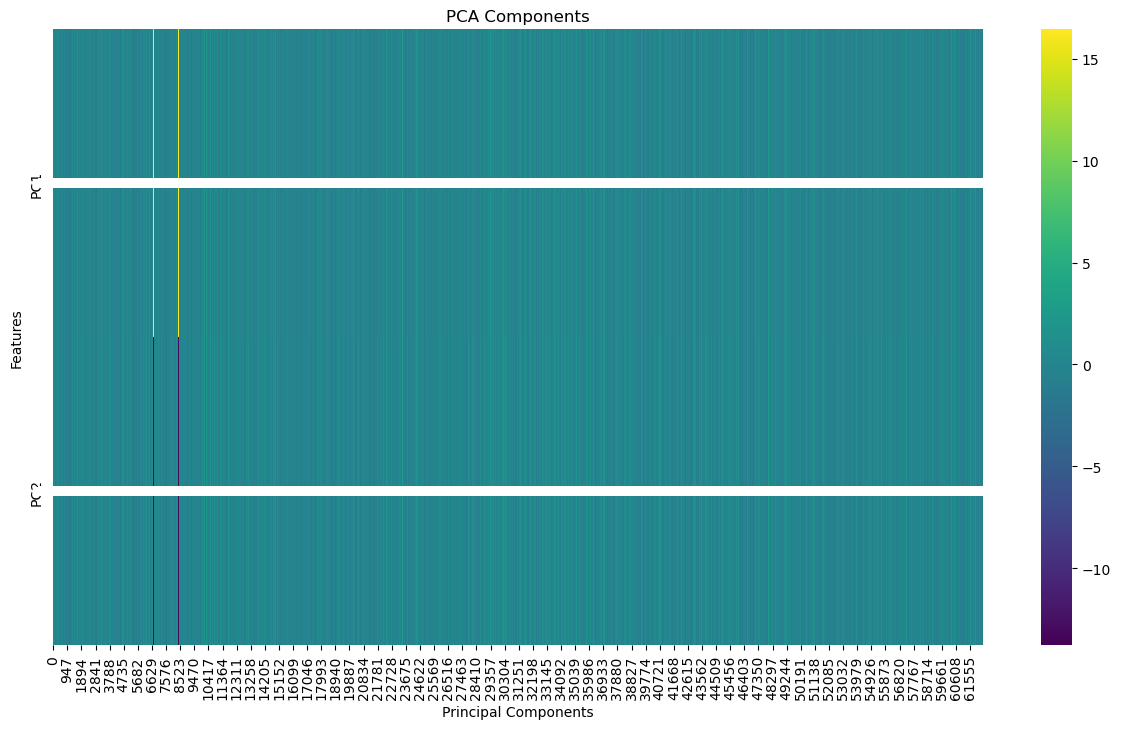

In [55]:
# set variables
target_column = 'points'
# Separate features and target
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]


# Standardize the features (if not already scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Create DataFrames with the principal components
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
train_pca_df[target_column] = y_train.reset_index(drop=True)

test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)
test_pca_df[target_column] = y_test.reset_index(drop=True)

# Save the DataFrames with principal components to CSV files
train_pca_df.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/processed/train_nhl_points.csv', index=False)
test_pca_df.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/processed/test_nhl_points.csv', index=False)

# Print the shapes of the DataFrames to verify
print("Shape of train_pca_df:", train_pca_df.shape)
print("Shape of test_pca_df:", test_pca_df.shape)

# Plot the PCA components
plt.figure(figsize=(15, 8))
sns.heatmap(train_pca_df.iloc[:, :-1].T, annot=True, cmap='viridis')
plt.title('PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()